In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import eigencharacter as ec
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [4]:
m_path = ec.get_resource_path('', 'character_M.pkl')
with m_path.open('rb') as fin:
    M = pickle.load(fin)

In [26]:
img = ec.recon(M[:,200], 64)

In [28]:
import numpy as np

In [29]:
fimg = np.fft.fft2(img)

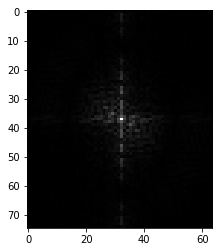

In [34]:
plt.imshow(np.fft.fftshift(np.abs(fimg)), cmap='gray')

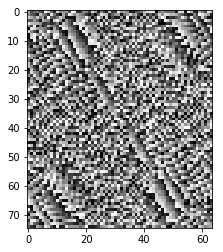

In [33]:
plt.imshow(np.fft.fftshift(np.angle(fimg)), cmap='gray')

slice(22, 52, None)

# Lowpass image

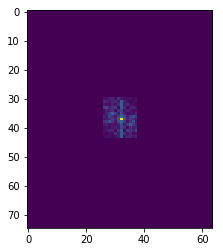

In [77]:
fimg_lfs = np.zeros(fimg.shape, dtype=np.complex128)
h, w = fimg_lfs.shape
slice_h = slice(h//2-h//10, h//2+h//10)
slice_w = slice(w//2-w//10, w//2+w//10)
# slice_h = slice(0, h)
# slice_w = slice(0, w)
fimg_lfs[slice_h, slice_w] = np.fft.fftshift(fimg)[slice_h, slice_w]
# fimg_lfs = fimg
plt.imshow(np.abs(fimg_lfs))

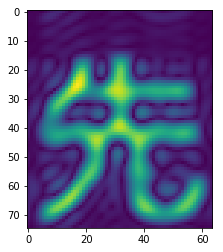

In [78]:
plt.imshow(np.abs(np.fft.ifft2(np.fft.fftshift(fimg_lfs))))

# Highpass image

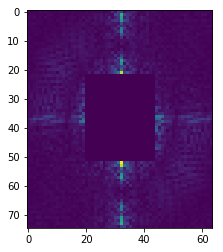

In [83]:
fimg_hfs = np.fft.fftshift(fimg.copy())
h, w = fimg_lfs.shape
slice_h = slice(h//2-h//5, h//2+h//5)
slice_w = slice(w//2-w//5, w//2+w//5)
# slice_h = slice(0, h)
# slice_w = slice(0, w)
fimg_hfs[slice_h, slice_w] = 0
# fimg_lfs = fimg
plt.imshow(np.abs(fimg_hfs))

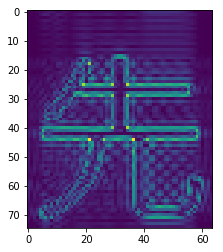

In [84]:
plt.imshow(np.abs(np.fft.ifft2(np.fft.fftshift(fimg_hfs))))

# Frequency component

## x-axis component

In [102]:
def draw_component(xoff, yoff):
    compo_x = np.zeros(fimg.shape, dtype=np.complex128)
    h, w = fimg.shape
    compo_x[h//2+yoff, w//2+xoff] = 1
    compo_x[h//2-yoff, w//2-xoff] = 1
    ax = plt.imshow(np.abs(np.fft.ifft2(np.fft.fftshift(compo_x))), cmap='gray')
    ax.settitle(f"Frequency component ({xoff, yoff})")
    return ax

AttributeError: 'AxesImage' object has no attribute 'settitle'

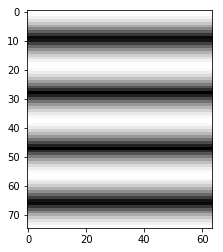

In [103]:
draw_component(0, 2)

## y-axis component

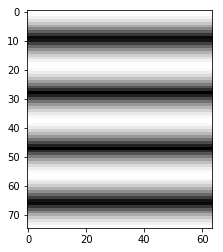

In [96]:
compo_y0 = np.zeros(fimg.shape, dtype=np.complex128)
h, w = fimg.shape
compo_y0[h//2+2, w//2] = 1
compo_y0[h//2-2, w//2] = 1
plt.imshow(np.abs(np.fft.ifft2(np.fft.fftshift(compo_y0))), cmap='gray')

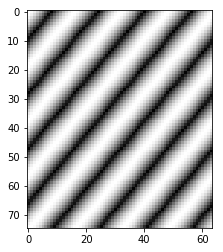

In [97]:
compo_xy = np.zeros(fimg.shape, dtype=np.complex128)
h, w = fimg.shape
compo_xy[h//2+2, w//2+2] = 1
compo_xy[h//2-2, w//2-2] = 1
plt.imshow(np.abs(np.fft.ifft2(np.fft.fftshift(compo_xy))), cmap='gray')